# K-Means Clustering for Sections

In [46]:
import re
import glob
import string

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.externals import joblib

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

In [47]:
list_of_dfs = []

for f in glob.glob('sections/*.csv'):
    list_of_dfs.append(pd.read_csv(f, encoding='utf-8-sig'))

In [48]:
list_of_dfs[0]

,country,iso,gdp,population,year,tariff_f,duty_f,quota_f,voluntary_restraint_f,subsidy_f,...,copyright_lf,countervailing_lf,unfair_lf,fair_trade_lf,trade_facilitation_lf,section_number,section_name,words,paragraphs,text
0,guyana,GUY,3.446266e+09,773303.0,2015,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,132,4,"['3.2.1 Export documentation and procedures',..."
1,hong_kong_china,HKG,3.210000e+11,7346700.0,2014,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,203,2,"['3.3.1 Export documents and procedures', '3...."


In [49]:
#doc list with section tag
section_text = []
section_names = []

translator = str.maketrans('', '', string.punctuation)

for df in list_of_dfs:
    text = ' '.join(list(df['text'].values))
    
    s = re.sub(r'\d+', '', text)
    ns = s.translate(translator)
    
    section_text.append(' '.join(ns.split()).lower())
    section_names.append(df['section_name'].values[0])

In [50]:
print((section_names[0], section_text[0]))

('export documentation and procedures', 'export documentation and procedures procedures applied to exports are similar to those applied to imports exporters must register with the gra predeparture declarations for exports must be submitted to the gra with the operation of the risk management unit in not all exports are subject to physical inspection except exports to the united states and the united kingdom the presence of a customs officer at exporters premises when containers are loaded is no longer necessary export containers are subject to scanning based on risk profiling when necessary physical inspections are conducted on consignments that are deemed to have high risks implementations of risk profiling have reportedly reduced inspections of shipments there are some additional measures applied to exports of forestry products section there are also facilitation measures provided for exports of perishable goods export documents and procedures an export declaration must be lodged ele

In [51]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(section_text)

In [52]:
tfidf_matrix.shape

(254, 23969)

In [53]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[ -2.22044605e-16,   6.78987591e-01,   6.31104700e-01, ...,
          6.43775253e-01,   7.15299864e-01,   6.21476217e-01],
       [  6.78987591e-01,   0.00000000e+00,   6.35851126e-01, ...,
          5.71018456e-01,   6.70875728e-01,   5.38523141e-01],
       [  6.31104700e-01,   6.35851126e-01,  -2.22044605e-16, ...,
          5.60234044e-01,   7.14616340e-01,   6.30806583e-01],
       ..., 
       [  6.43775253e-01,   5.71018456e-01,   5.60234044e-01, ...,
          1.11022302e-16,   6.41397524e-01,   5.46563524e-01],
       [  7.15299864e-01,   6.70875728e-01,   7.14616340e-01, ...,
          6.41397524e-01,  -2.22044605e-16,   6.50818362e-01],
       [  6.21476217e-01,   5.38523141e-01,   6.30806583e-01, ...,
          5.46563524e-01,   6.50818362e-01,  -2.22044605e-16]])

In [54]:
num_clusters = 12

km = KMeans(n_clusters=num_clusters)
#km = GaussianMixture(n_components=1)

%time km.fit(tfidf_matrix.toarray())

CPU times: user 5.84 s, sys: 602 ms, total: 6.44 s
Wall time: 6.01 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
clusters = km.labels_.tolist()

In [56]:
sections_dict = {'section_names' : section_names, 'clusters' : clusters}
df = pd.DataFrame(sections_dict, index=[clusters], columns=['section_names', 'clusters'])

In [57]:
df

,section_names,clusters
2,export documentation and procedures,2
4,other charges,4
5,export incentives,5
5,registration customs documents and procedures,5
5,customs procedures and valuation,5
5,export prohibitions authorizations and licensing,5
5,export subsidies promotion and assistance,5
10,prohibitions licensing and controls,10
4,tariffs and other charges affecting imports,4
2,export duty drawback,2


In [68]:
#Note: line directly below is used in visualization only
cluster_samples = {}

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

c_counter = 0
names = list(df['section_names'].values)
clus = list(df['clusters'].values)

for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    
    s_list = []
    
    for c in range(len(clus)):
        if clus[c] == i:
            print(' %s,' % names[c], end='')
            s_list.append(names[c])
        
    cluster_samples[c_counter] = s_list[:2]
    c_counter+=1
            
    print('\n')

Cluster 0: tariffs, ordinary customs duties, preferences, bindings, tariff preferences,

Cluster 1: customs valuation, tariff schedule, dispute settlement and appeals procedures, state trading state-owned enterprises, customs valuation and pre-shipment inspection, export credit insurance and guarantees,

Cluster 2: export documentation and procedures, export duty drawback, export procedures taxes and restrictions, export procedures taxes and levies, export subsidies and inward processing, marking labelling and packaging, procedures export taxes and restrictions, export finance promotion and marketing assistance insurance and guarantees, tariffs and excise duties, other taxes and charges, taxes charges and levies, export duties charges and levies, state trading enterprises, export assistance and facilitation, preferential and non-preferential rules of origin, export support financing and promotion, export duties, foreign exchange surrender and conversion requirements, taxes and other ex

In [60]:
cluster_samples

{0: ['tariffs', 'ordinary customs duties'],
 1: ['customs valuation', 'tariff schedule'],
 2: ['export documentation and procedures', 'export duty drawback'],
 3: ['technical regulations and standards',
  'standards technical requirements and conformity assessment'],
 4: ['other charges', 'tariffs and other charges affecting imports'],
 5: ['export incentives', 'registration customs documents and procedures'],
 6: ['goods in transit'],
 7: ['export subsidies and incentives',
  'incentives subsidies and other government assistance'],
 8: ['export subsidies and duty and tax concessions', 'tariff quotas'],
 9: ['research and development support'],
 10: ['prohibitions licensing and controls',
  'import licensing quotas and prohibitions'],
 11: ['non-tax incentives and other assistances',
  'foreign investment location incentives']}

# Visualization

>**NOTE:** We only have 22 colors -- add more if # clusters > 22.

In [61]:
import random

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1)
points = pca.fit_transform(dist)

xs, ys = points[:, 0], points[:, 1]

In [64]:
possible_colors = ['#FA5858', '#B40404', '#610B0B', '#FAAC58', '#DF7401', '#FFFF00',
                   '#AEB404', '#BFFF00', '#86B404', '#80FF00', '#58FAF4', '#086A87',
                   '#2E64FE', '#0404B4', '#8258FA', '#4B088A', '#FF00FF', '#B4045F',
                   '#FA58D0', '#A4A4A4', '#000000', '#886A08']
 
#names are the dict from above: cluster_samples
cluster_colors = {}

prev_picks = []
counter = 0
while len(cluster_colors) < num_clusters:
    pick_random = random.randint(a=0, b=len(possible_colors)-1)
    if pick_random not in prev_picks:
        cluster_colors[counter] = possible_colors[pick_random]
        prev_picks.append(pick_random)
        counter += 1

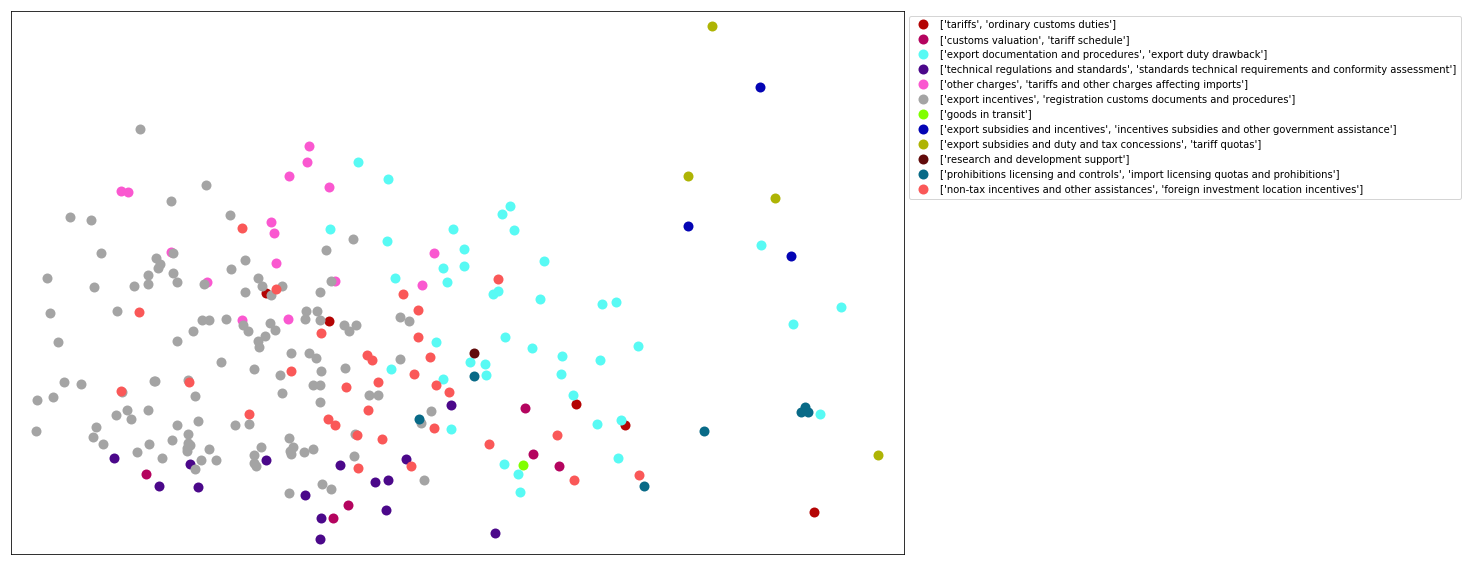

In [65]:
%matplotlib inline 
df_vals = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=section_names)) 
groups = df_vals.groupby('label')

fig, ax = plt.subplots(figsize=(16, 10))
ax.margins(0.03)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_samples[name], color=cluster_colors[name], mec='none')
    
    ax.set_aspect('auto')
    ax.tick_params(bottom='off', top='off', labelbottom='off')
    ax.tick_params(left='off', top='off', labelleft='off')
    
plt.legend(bbox_to_anchor=(1, 1))
    
plt.show()